In [1]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

def _vis_landscapes(
        fig,
        axs: plt.Axes,
        landscapes, # list of np.ndarray
        labels, # list of labels of correlated landscapes
        full_range, # dict, 
        true_optima,
        title,
        save_path, # figure save path
        params_paths, # list of list of parameters correlated to landscapes
        recon_params_path_dict=None,
        origin_params_path_dict=None,
        converged_soln_markers=None,
    ):

    assert len(landscapes) == len(labels)
    assert len(landscapes) == len(params_paths)

    axs = axs.reshape(-1)

    # TODO Check ij and xy
    X, Y = np.meshgrid(full_range['beta'], full_range['gamma'], indexing="ij")

    # c = ax.pcolormesh(X, Y, Z, cmap='viridis', vmin=Z.min(), vmax=Z.max())
    for idx, landscape in enumerate(landscapes):
        im = axs[idx].pcolormesh(X, Y, landscape) #, cmap='viridis', vmin=origin.min(), vmax=origin.max())
        axs[idx].set_xlabel(r'$\beta$')
        if idx == 0:
            axs[idx].set_ylabel(r'$\gamma$')
        # else:
        axs[idx].set_yticks([])
        axs[idx].set_xticks([])
        if isinstance(true_optima, list) or isinstance(true_optima, np.ndarray):
            axs[idx].plot(true_optima[1], true_optima[0], marker="o", color='red', markersize=7, label="true optima")

        params = params_paths[idx]
        if isinstance(params, list) or isinstance(params, np.ndarray):
            xs = [] # beta
            ys = [] # gamma
            for param in params:
                xs.append(param[0])
                ys.append(param[1])

            axs[idx].plot(xs, ys, linewidth=3, color='purple', label="opt. path")
            axs[idx].plot(xs[0], ys[0], marker="o", color='white', markersize=9, label="initial pt")

            if isinstance(converged_soln_markers, list):
                marker = converged_soln_markers[idx]
                if marker == '*':
                    markersize = 15
                elif marker == 'D':
                    markersize = 10
                
            else:
                marker = '*'
                markersize = 15

            axs[idx].plot(xs[-1], ys[-1], marker=marker,
                    color='red', markersize=markersize, label="converged pt")

            axs[idx].legend(loc='upper center')

    fig.colorbar(im, ax=[axs[i] for i in range(len(landscapes))], pad=0.05)
    # plt.legend()
    # fig.tight_layout()

In [ ]:
def sec3_opt_path_and_landscape():
    opt_data = np.load(
    "figs/opt_on_recon_landscape/maxcut/sv-ideal-p=1/maxcut-sv-ideal-n=16-p=1-seed=0-ADAM-maxiter=10000-[0.1, -0.1].npz"
    , allow_pickle=True)

    


In [2]:
a = np.arange(0, 12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [4]:
a[(2, 2)]

10

In [39]:
def vis_landscape():
    def f(x, y):
        print(x, y)
        return np.sin(np.sqrt(x ** 2 + y ** 2))

    x = np.linspace(-6, 6, 30)
    y = np.linspace(-6, 6, 30)

    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    print(Z.shape)

    fig = plt.figure(figsize=[10, 10])
    ax = plt.axes(projection='3d')
    # ax.contour3D(X, Y, Z, 50, cmap='binary')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    # ax.view_init(60, 35)
    fig.savefig(f'figs/test.png')

In [23]:
def vis_landscape():
    def f(x, y):
        # z = np.sin(np.sqrt(x ** 2 + y ** 2))
        z = x * 4 + y
        print(z)
        return z

    # x = np.linspace(-6, 6, 30)
    # y = np.linspace(-6, 6, 30)

    x = np.arange(4)
    y = np.arange(4)

    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    z_min, z_max = Z.min(), Z.max()
    # print(Z.shape)

    # fig = plt.figure(figsize=[10, 10])
    fig, ax = plt.subplots()

    # ax = plt.axes(projection='3d')
    # ax.contour3D(X, Y, Z, 50, cmap='binary')
    # ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
    #             cmap='viridis', edgecolor='none')
    c = ax.pcolormesh(X, Y, Z, cmap='viridis', vmin=z_min, vmax=z_max)
    ax.axis([x.min(), x.max(), y.min(), y.max()])
    fig.colorbar(c, ax=ax)
    
    plt.plot(0,0, "ro")
    # ax.set_xlabel('x')
    # ax.set_ylabel('y')
    # ax.set_zlabel('z')
    # ax.view_init(60, 35)
    fig.savefig(f'figs/test.png')

[[ 0  4  8 12]
 [ 1  5  9 13]
 [ 2  6 10 14]
 [ 3  7 11 15]]


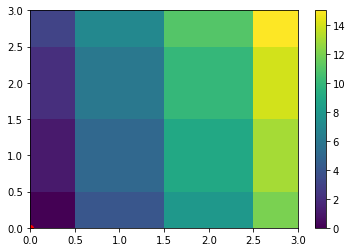

In [24]:
vis_landscape()

In [37]:
beta = np.linspace(-np.pi, np.pi, 2)
print(beta)
# beta = np.expand_dims(beta, axis=1)
# print(beta)
gamma = np.linspace(-np.pi/2, np.pi/2, 2)
# gamma = np.expand_dims(gamma, axis=1)
print(gamma)
X, Y = np.meshgrid(beta, gamma, indexing='ij')



[-3.14159265  3.14159265]
[-1.57079633  1.57079633]


In [38]:
print(X)
print(Y)

[[-3.14159265 -3.14159265]
 [ 3.14159265  3.14159265]]
[[-1.57079633  1.57079633]
 [-1.57079633  1.57079633]]


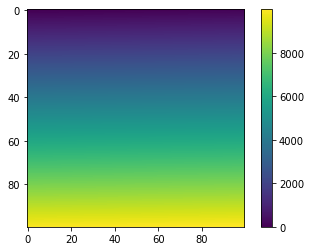

In [2]:
def heatmap2d(arr: np.ndarray):
    plt.imshow(arr, cmap='viridis')
    plt.colorbar()
    plt.show()


test_array = np.arange(100 * 100).reshape(100, 100)
heatmap2d(test_array)